# 1. 元组(Tuple)

元组由简单的对象组构成，与列表非常类似，它的大部分执行操作在介绍列表时已经学过了，只不过元组是不可变的。元组通常写成圆括号（而不是方括号）的形式。虽然元组不支持多数方法调用，但元组具有列表的大多数属性。

- 任意对象的有序集合
      与字符串和列表类似，元组是一个位置有序的对象的集合（也就是其内容维持从左到右的顺序）。与列表相同，可以嵌入到任何类别的对象中。

- 通过偏移存取
      同字符串和列表一样，在元组中的元素通过偏移（而不是键）来访问，它们支持所有基于偏移的操作。例如，索引和分片。

- 属于不可变序列类型
      类似于字符串，元组是不可变的，它不支持任何原处修改操作。
      
- 固定长度、异构、任意嵌套
      因为元组是不可变的，在不生成一个拷贝的情况下不能增长或缩短。另一方面，元组可以嵌套包含其它复合对象（例如列表、字典和其它元组等）。
      
- 对象引用的数组
      元组存储指向其它对象的引用，因此对元组进行索引操作的速度相对较快。

In [1]:
type((1, 2))

tuple

In [2]:
(1, 2) + (3, 4)         # Concatenation

(1, 2, 3, 4)

In [3]:
(1, 2) * 4              # Repetition

(1, 2, 1, 2, 1, 2, 1, 2)

In [4]:
T = (1, 2, 3, 4)        # Indexing, slicing
T[0], T[1:3]

(1, (2, 3))

如果圆括号里的唯一对象是一个表达式，则不是元组；如果确认需要构造一个元组，需要在这个对象之后加一个逗号。

In [5]:
x = (40)
x

40

In [6]:
y = (40, )
y

(40,)

## 1.1 转换

如果想对元组进行排序，通常先得将它转换为列表（成为可变对象），才能获得使用排序方法调用的权限。或者使用 Python 内置的 sorted() 方法：

In [7]:
T = ('cc', 'aa', 'dd', 'bb')
tmp = list(T)                # Make a list from a tuple's items
tmp.sort()                   # Sort the list
tmp

['aa', 'bb', 'cc', 'dd']

In [8]:
T = tuple(tmp)               # Make a tuple from the list's items
T

('aa', 'bb', 'cc', 'dd')

In [9]:
sorted(T)                    # Or use the sorted built-in, and save two steps

['aa', 'bb', 'cc', 'dd']

列表解析也可用于元组的转换：

In [10]:
T = (1, 2, 3, 4, 5)
L = [x + 20 for x in T]      # 元组逐项加上20，构造出新的列表
L

[21, 22, 23, 24, 25]

## 1.2 方法

元组包含两个方法 index() 和 count()，分别用来获取指定元素的下标和获取指定元素在元组中出现的次数：

In [11]:
T = (1, 2, 3, 2, 4, 2)       # Tuple methods in 2.6, 3.0, and later
T.index(4)                   # Offset of first appearance of 2

4

In [12]:
tu = ('hello', 333,  (44, 55,), [(888, 999,)], 54, 333, True)
v = tu.index(333, 4, 7)      # 待查询下标的元素, 查询起始索引，查询终止索引 
v

5

In [13]:
T.count(2)                   # How many 2s are there?

3

## 1.3 不可变性

元组是不可变的，尝试改变其内容将会报错。

In [14]:
T = (1, [2, 3], 4)
# T[1] = 'spam'          # This fails: can't change tuple itself

但是，元组的不可变性只适用于元组本身顶层而并非其内容。例如，元组内部的列表是可以修改的：

In [15]:
T[1][0] = 'spam'         # This works: can change mutables inside

为什么有了列表还要元组？

元组的不可变性提供了某种完整性。这样可以确保元组在程序中不会被另一个引用修改，而列表就没有这样的保证了。因此，元组类似于 C++ 中的 const 声明。

# 2. 文件(File)

## 文件对象

文件对象与我们之前见过的其它类型不同，它不是数字、序列或映射，对表达式操作符没有相关响应，它们只包含通用文件处理的方法。文件对象的多数方法都与执行外部文件的输入输出操作有关，还有一些方法可以查找文件中新位置(seek())、刷新输出缓存(flush())。

## 2.1 打开文件

可以通过调用内置 open() 函数创建一个 Python 文件对象，它是计算机上的一个文件链接。调用 open() 函数的参数包含文件名和处理模式。

```
afile = open(filename, mode)
afile.method()
```

处理模式使用字符串 'r' 代表读取文件（默认值），'w' 代表创建并写文件，'a' 代表在打开文件并在文件尾部追加内容。在模式字符串末尾加上 'b' 代表进行二进制数据处理，加上 '+' 代表同时进行读写操作。

让我们看一个文件处理的简单例子。首先创建并打开一个新文件，写入两个字符串（以换行符 \n 结束），之后关闭文件。

In [16]:
myfile = open('myfile.txt', 'w')           # Open for text output: create/empty
myfile.write('hello text file\n')          # Write a line of text: string, return the number of characters written

16

In [17]:
myfile.write('goodbye text file\n')

18

In [18]:
myfile.close()                             # Flush output buffers to disk

然后我们再打开同一个文件，使用 readline() 方法逐行读取其内容。注意，第三个 readline() 返回空字符串，这代表已经到达文件底部。

In [19]:
myfile = open('myfile.txt', 'r')           # Open for text input: 'r' is default
myfile.readline()                          # Read the lines back

'hello text file\n'

In [20]:
myfile.readline()

'goodbye text file\n'

In [21]:
myfile.readline()

''

In [22]:
myfile.close()

也可以用 read() 方法一次将整个文件读入到一个字符串中，

In [23]:
print(open('myfile.txt').read())

hello text file
goodbye text file



也可以使用文件迭代器来一行一行读取文件。open() 创建的临时文件对象将自动在每次循环迭代的时候读入并返回一行。

In [24]:
for line in open('myfile.txt'): # Use file iterators, not reads
    print(line, end='')

hello text file
goodbye text file


## 2.2 在文件中存储并解析Python对象

下面这个例子将把多种 Python 对象写入文本文件。需要注意的是，这里使用了转换工具将对象转成了字符串。

In [25]:
S = 'Spam'                                  # Must be strings to store in file
X, Y, Z = 43, 44, 45                        # Native Python objects
L = [1, 2, 3]
D = {'a': 1, 'b': 2}

F = open('datafile.txt', 'w')               # Create output text file
F.write(S + '\n')                           # Terminate lines with \n
F.write('%s,%s,%s\n' % (X, Y, Z))           # Convert numbers to strings
F.write(str(L) + '$' + str(D) + '\n')       # Convert and separate with $
F.close()

在创建文件后，就可以通过打开和读取字符串来查看文件的内容。

In [26]:
chars = open('datafile.txt').read()         # Raw string display
chars

"Spam\n43,44,45\n[1, 2, 3]${'a': 1, 'b': 2}\n"

In [27]:
print(chars)

Spam
43,44,45
[1, 2, 3]${'a': 1, 'b': 2}



现在我们需要借助转换工具，将文本文件中的字符串转换成真正的 Python 对象。

In [28]:
F = open('datafile.txt')        # Open again
line = F.readline()             # Read one line
line

'Spam\n'

对于第一行来说，我们使用字符串 rstrip() 方法去除多余的换行符。也可以使用 line[:-1]分片操作，但是只有确定所有行都含有 '\n' 的时候才行（文件中最后一行有时不含换行符）。

In [29]:
line.rstrip()                       # Remove end-of-line, 包括空格、换行(\n)、制表符(\t)等

'Spam'

现在，开始读包含数字的下一行，并解析出该行中的对象：

In [30]:
line = F.readline()                 # Next line from file
line                                # It's a string here

'43,44,45\n'

我们这里是用 split() 方法，从逗号分隔符的地方断开，得到的结果是包含数字的字符串列表。如果我们想对这些数字做数学运算，还得把字符串转为整数。这里我们不一定非要运行 rstrip() 来删除最后部分的 '\n'，int() 会忽略数字后面的换行符。

In [31]:
parts = line.split(',')             # Split (parse) on commas
parts

['43', '44', '45\n']

In [32]:
numbers = [int(P) for P in parts]   # Convert all in list at once
numbers

[43, 44, 45]

最后，要转换文件第三行存储的列表和字典，我们可以运行 eval() 这一内置函数，eval() 能把字符串视作可执行程序代码。

In [33]:
line = F.readline()
line

"[1, 2, 3]${'a': 1, 'b': 2}\n"

In [34]:
parts = line.split('$')                 # Split (parse) on $
parts

['[1, 2, 3]', "{'a': 1, 'b': 2}\n"]

In [35]:
eval(parts[0])                          # Convert to any object type

[1, 2, 3]

In [36]:
objects = [eval(P) for P in parts]      # Do same for all in list
objects

[[1, 2, 3], {'a': 1, 'b': 2}]

## 2.3 用 pickle 存储 Python 原生对象

Python 标准库 pickle 模块是通用的数据格式化和解析工具，实现了基本的数据序列化和反序列化。它能够让我们直接在文件中存储几乎任何 Python 对象的高级工具，不需要借助字符串转换来转换去。

例如，想要在文件中存储字典，就直接用 pickle 来存储。序列化的方法为 pickle.dump()，该方法实现的是将序列化后的对象以二进制形式写入文件中，进行保存。

In [37]:
import pickle

D = {'a': 1, 'b': 2}
file = open('datafile.pkl', 'wb')

pickle.dump(D, file)        # Pickle any object to file
file.close()

想要取回字典时，只要简单地再一次 pickle 进行重建就可以了。反序列化的方法为 pickle.load()，该方法实现的是将序列化的对象从文件中读取出来。

In [38]:
file = open('datafile.pkl', 'rb')
E = pickle.load(file)          # Load any object from file
file.close()
E

{'a': 1, 'b': 2}

不需要分割或转换操作，我们就可以取回相同的字典对象。pickle 模块内部执行的是**对象序列化**(object serialization)，也就是对象和字符串之间的相互转换，但我们并不需要关心内部具体如何实现的。

## 2.4 二进制文件的处理

有些时候我们需要处理打包的二进制数据，这些数据可能是 C/C++ 语言生成的。Python 的标准库包含一个处理模块：struct 模块，它包含了 pack() 和 unpack() 函数，能打包和解析打包的二进制数据。从某种意义上来说，它是一个数据转换工具，能把文件中的字符串解读为二进制数据。

struct 模块具体支持的格式为：


|Format|C Type|Python type|Standard size|
|------|------|-----------|-------------|
| c | char | bytes of length 1 | 1|
| b | signed char | integer | 1 |
| B | unsigned char | integer | 1 |
| ? | _Bool | bool | 1 |
| h | short | integer | 2 |
| H | unsigned short | integer | 2 |
| i | int | integer | 4 |
| I | unsigned int | integer | 4 |
| l | long | integer | 4 |
| L | unsigned long | integer | 4 |
| q | long long | integer | 8 |
| Q | unsigned long long | integer | 8 |
| N | size_t | integer |
| e | half precision | float | 2 |
| f | float | float | 4 |
| d | double | float | 8 |
| s | char[] | bytes |
| p | char[] | bytes |
| P | void * | integer |

例如，要生成一个二进制数据文件，用 'wb'（写入二进制）模式创建文件，并将格式化字符串对象传给 struct。这里用的格式化字符串包含一个4字节的整数、一个包含4个字符的字符串以及一个2字节的整数。

In [39]:
import struct

F = open('data.bin', 'wb')                      # Open binary output file
data = struct.pack('>i4sh', 7, b'spam', 8)      # Make packed binary data
data

b'\x00\x00\x00\x07spam\x00\x08'

In [40]:
F.write(data)                                   # Write byte string
F.close()

Python 生成一个我们通常写入文件的二进制数据字符串（如果打印它们，将以十六进制的格式进行打印）。要将值解析为普通 Python 对象，可以简单地读取字符串，并使用相同格式的字符串把它解压出来就可以。

In [41]:
F = open('data.bin', 'rb')
data = F.read()                                 # Get packed binary data
F.close()
data

b'\x00\x00\x00\x07spam\x00\x08'

In [42]:
values = struct.unpack('>i4sh', data)           # Convert to Python objects
values

(7, b'spam', 8)

In [43]:
values = struct.unpack('<i4sh', data)           # Convert to Python objects
values

(117440512, b'spam', 2048)

struct 可以根据本地机器字节顺序转换，它用格式化字符串中的第一个字符来改变对齐方式，定义如下：

|Character|Byte order|Size|Alignment|
|---------|----------|----|---------|
| @ | native | native |native|
| = | native | standard |none|
| < | little-endian | standard | none|
| > | big-endian | standard |none|
| ! | network (= big-endian) | standard |none|

![img](images/chapter04/endianness.png)

下面是使用 struct 配合 numpy 模块进行二进制图像文件读写的示例：

In [44]:
import numpy as np
import struct

image = np.zeros((256, 256), dtype=np.float)
for i in range(256):
    image[i] = np.arange(256)

# 写二进制文件
fp = open('image.raw', 'wb')
write_buf = struct.pack('={}f'.format(image.size), *image.flatten())
fp.write(write_buf)
fp.close()

从硬盘读取该文件，并使用 Matlpotlib 绘制出来：

In [45]:
import matplotlib.pyplot as plt

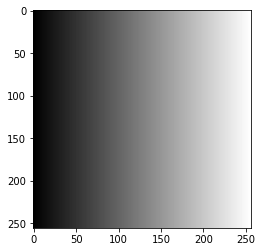

In [46]:
# 读取二进制文件
fp = open('image.raw', 'rb')
raw_data = fp.read(256 * 256 * 4)
raw_data = struct.unpack('={}f'.format(256 * 256), raw_data)
image = np.asarray(raw_data).reshape(256, 256)
fp.close()

plt.imshow(image, cmap=plt.cm.gray)
plt.show()

## 2.5 文件上下文管理器(File Context Manager)

文件上下文管理器使用 **with** 语句实现，它比文件对象多了一个异常处理功能，允许我们把文件处理代码包装到一个逻辑层，以确保在退出时可以自动关闭文件，而不是依赖于**垃圾收集**(garbage collection)上的自动关闭。

In [47]:
with open('myfile.txt') as myfile:
    for line in myfile:
        print(line)

hello text file

goodbye text file



Python 中提供的 try/finally 异常处理语句也可以实现类似的功能，但是需要一些额外代码：

In [48]:
myfile = open('myfile.txt')
try:
    for line in myfile:
        print(line)
finally:
    # 无论是否发生异常都将执行
    myfile.close()

hello text file

goodbye text file



# 3. None对象

Python 还有一个特殊对象：None，在条件判断表达式中它总被认为是假。这是 Python 中一种特殊数据类型的唯一值。None不是意味着“未定义”，它是一个真正的对象，并且有一块内存。它一般起到一个空的占位作用。它还是函数的默认返回值。

- None 是一个特殊的常量

- None 和 False 不同

- None 不是 0

- None 不是空字符串

- None 和任何其他的数据类型比较永远返回 False

- None 有自己的数据类型 NoneType

- 可以将 None 赋值给任何变量，但是不能创建其它 NoneType 对象

例如，对于列表来说，无法为一个超出范围的偏移进行赋值操作。要预先分配一个10项的列表，你可以在10个位置上都预先设置为None：

In [49]:
L = [None] * 10
L

[None, None, None, None, None, None, None, None, None, None]

# 练习

1. 写个表达式将元组 (4, 5, 6) 改为 (1, 5, 6)。

2. 读取一个二进制图像文件，并尝试进行图像处理（更改其像素数值）再写回文件。